Inspirado de https://github.com/mircealex/Scraped_dataset_movie_ratings

In [1]:
from time import sleep, time
from random import randint
from warnings import warn

from bs4 import BeautifulSoup
import pandas as pd
from requests import get
from IPython.display import clear_output

%load_ext autotime

time: 242 µs (started: 2023-08-25 11:38:44 -05:00)


In [2]:
paginas = (1, 251)
url_años = [str(i) for i in range(2000, 2023)]


# Listas para guardar los datos scrapeados
nombres = []
años = []
calificaciones_imdb = []
metascores = []
votos = []

# Preparacion para monitorear las iteraciones
tiempo_inicio = time()
peticiones = 0

time: 761 µs (started: 2023-08-25 11:38:48 -05:00)


In [3]:
for año in url_años:
    for pagina in paginas:

        url = f'https://www.imdb.com/search/title/?release_date={año}-01-01,{año}-12-31'
        url += f'&sort=num_votes,desc&count=250&start={pagina}&ref_=adv_nxt'

        # Hacer la peticion
        respuesta = get(url)

        # Pausar el ciclo
        sleep(randint(8,15))

        # Monitorear las peticiones
        peticiones += 1
        tiempo_transcurrido = time() - tiempo_inicio
        print(f'Petición: {peticiones}; Frecuencia: {peticiones/tiempo_transcurrido} peticiones/s')
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if respuesta.status_code != 200:
            warn('Petición: {}; Status code: {}'.format(peticiones, respuesta.status_code))

        # Rompe el ciclo si el número de peticiones es muy mayor que el esperado
        if peticiones > 47:
            warn('Número de peticiones fue mayor al esperado.')
            break

        # Parsea el contenido de la petición con BeautifulSoup
        sopa_html = BeautifulSoup(respuesta.text, 'html.parser')

        # Selecciona todos los 250 contenedores de películas de una sola página
        contenedores_pelicula = sopa_html.find_all('div', class_ = 'lister-item mode-advanced')

        # Por cada película de estas 250
        for contenedor in contenedores_pelicula:
            # Si la película tiene Metascore, entonces extrae:
            if contenedor.find('div', class_ = 'ratings-metascore') is not None:
                
                # El nombre
                nombre = contenedor.h3.a.text
                nombres.append(nombre)

                # El año
                año = contenedor.h3.find('span', class_ = 'lister-item-year').text
                años.append(año)

                # La calificación IMDB
                imdb = float(contenedor.strong.text)
                calificaciones_imdb.append(imdb)

                # El Metascore
                m_score = contenedor.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # El número de votos
                voto = contenedor.find('span', attrs = {'name':'nv'})['data-value']
                votos.append(int(voto))

time: 10min 35s (started: 2023-08-25 11:38:55 -05:00)


In [4]:
print()
print("Generando dataframe con datos crudos...")
print()


df = pd.DataFrame({
    'película': nombres,
    'año': años,
    'imdb': calificaciones_imdb,
    'metascore': metascores,
    'votos': votos
})

df.to_csv('calificaciones_peliculas_raw.csv')


Generando dataframe con datos crudos...

time: 64.3 ms (started: 2023-08-25 11:49:37 -05:00)


In [4]:
# Usa esta línea en caso de que no quieras correr el scraper
# Aquí se convierte el CSV en un dataframe de Pandas
# df = pd.read_csv("calificaciones_peliculas_raw.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   película   4106 non-null   object 
 1   año        4106 non-null   object 
 2   imdb       4106 non-null   float64
 3   metascore  4106 non-null   int64  
 4   votos      4106 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 160.5+ KB
None
time: 56.6 ms (started: 2023-08-25 11:49:50 -05:00)


In [6]:
print(df.shape)

(4106, 5)
time: 10.5 ms (started: 2023-08-25 11:49:54 -05:00)


In [7]:
print(df.head(n=15))

                      película     año  imdb  metascore    votos
0                    Gladiator  (2000)   8.5         67  1556370
1                      Memento  (2000)   8.4         83  1282536
2           Cerdos y diamantes  (2000)   8.2         55   883667
3          Requiem for a Dream  (2000)   8.3         71   871915
4              American Psycho  (2000)   7.6         64   672453
5                        X-Men  (2000)   7.3         64   632614
6                    Cast Away  (2000)   7.8         73   617739
7                  Unbreakable  (2000)   7.3         62   431231
8       Mission: Impossible II  (2000)   6.1         59   365914
9             Meet the Parents  (2000)   7.0         73   346439
10  O Brother, Where Art Thou?  (2000)   7.7         69   322905
11       Gone in Sixty Seconds  (2000)   6.5         35   288276
12               Almost Famous  (2000)   7.9         90   286373
13                 The Patriot  (2000)   7.2         63   286135
14             Wo hu cang

In [8]:
df = df[['película', 'año', 'imdb', 'metascore', 'votos']]
df.head()

,película,año,imdb,metascore,votos
0,Gladiator,(2000),8.5,67,1556370
1,Memento,(2000),8.4,83,1282536
2,Cerdos y diamantes,(2000),8.2,55,883667
3,Requiem for a Dream,(2000),8.3,71,871915
4,American Psycho,(2000),7.6,64,672453


time: 40.6 ms (started: 2023-08-25 11:49:59 -05:00)


In [9]:
df['año'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)',
       '(I) (2002)', '(2002 Video)', '(2003)', '(I) (2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(III) (2006)', '(II) (2006)', '(2007)', '(I) (2007)',
       '(II) (2007)', '(2008)', '(I) (2008)', '(2009)', '(I) (2009)',
       '(II) (2009)', '(2010)', '(I) (2010)', '(II) (2010)', '(2011)',
       '(I) (2011)', '(IV) (2011)', '(2012)', '(I) (2012)', '(II) (2012)',
       '(2013)', '(I) (2013)', '(II) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(III) (2014)', '(2015)', '(I) (2015)',
       '(II) (2015)', '(VI) (2015)', '(III) (2015)', '(I) (2016)',
       '(2016)', '(II) (2016)', '(IX) (2016)', '(V) (2016)', '(2017)',
       '(I) (2017)', '(II) (2017)', '(III) (2017)', '(2018)',
       '(I) (2018)', '(III) (2018)', '(II) (2018)', '(I) (2019)',
       '(2019)', '(II) (2019)', '(III) (2019)', '(2020)', '(I) (2020)',
       '(II) (2020)', '(IV) (2020)', '(V) (2020

time: 75.6 ms (started: 2023-08-25 11:50:02 -05:00)


In [10]:
df.loc[:, 'año'] = df['año'].str.strip(' Video)').str[-4:].astype(int)

time: 5.63 ms (started: 2023-08-25 11:50:06 -05:00)


In [11]:
df['año'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=object)

time: 5.53 ms (started: 2023-08-25 11:50:07 -05:00)


In [12]:
df = df.astype({'año': int})

time: 2.97 ms (started: 2023-08-25 11:50:11 -05:00)


In [13]:
df['año'].head(5)

0    2000
1    2000
2    2000
3    2000
4    2000
Name: año, dtype: int64

time: 7.18 ms (started: 2023-08-25 11:50:12 -05:00)


In [14]:
df.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,1.5,7.0
max,9.0,100.0


time: 38.8 ms (started: 2023-08-25 11:50:15 -05:00)


In [15]:
df['n_imdb'] = df['imdb'] * 10
df.head(3)

,película,año,imdb,metascore,votos,n_imdb
0,Gladiator,2000,8.5,67,1556370,85.0
1,Memento,2000,8.4,83,1282536,84.0
2,Cerdos y diamantes,2000,8.2,55,883667,82.0


time: 13 ms (started: 2023-08-25 11:50:18 -05:00)


In [16]:
df.to_csv('calificaciones_peliculas.csv')

time: 18.4 ms (started: 2023-08-25 11:50:20 -05:00)


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

time: 853 ms (started: 2023-08-25 11:50:24 -05:00)


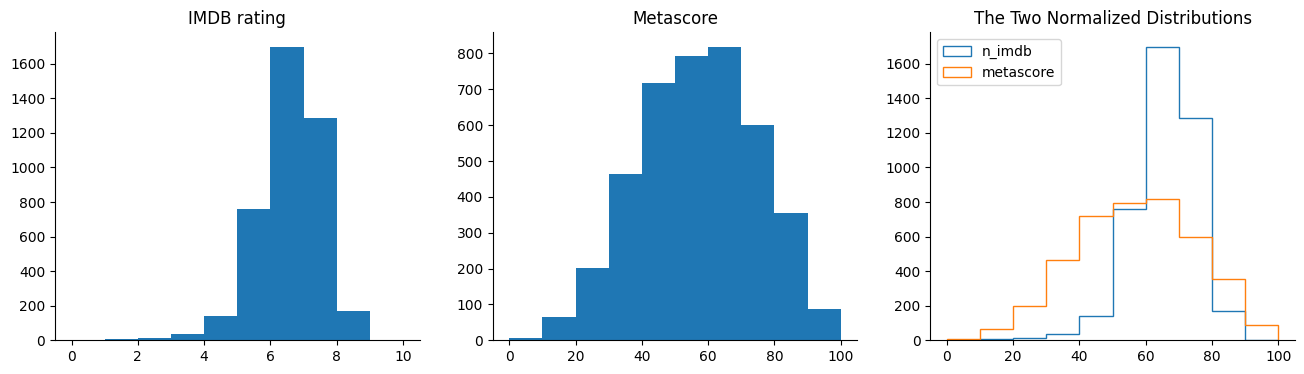

time: 613 ms (started: 2023-08-25 11:50:27 -05:00)


In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(df['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(df['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(df['n_imdb'], bins = 10, range = (0,100), histtype = 'step', label='n_imdb')
ax3.hist(df['metascore'], bins = 10, range = (0,100), histtype = 'step', label='metascore')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()